In [9]:
# Create your first MLP in Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
import os
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [10]:
# fix random seed for reproducibility
np.random.seed(1)

In [11]:
dataset = np.loadtxt("train_en.txt")
# split into input (X) and output (Y) variables
X = dataset[:,0:300]
Y = dataset[:,300]
Y = keras.utils.to_categorical(Y, num_classes=13)

test_data = np.loadtxt("test_en.txt")
# split into input (X) and output (Y) variables
X_test = dataset[:,0:300]
Y_test = dataset[:,300]
Y_test = keras.utils.to_categorical(Y_test, num_classes=13)

In [12]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=300, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='sigmoid'))
# Compile model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 13)                1313      
Total params: 31,413
Trainable params: 31,413
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Fit the model 1
history = model.fit(X, Y, epochs=50, batch_size=10,
          validation_data=(X_test, Y_test))
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 31933 samples, validate on 31933 samples
Epoch 1/50
31933/31933 [==============================] - 10s - loss: 2.2121 - acc: 0.2079 - val_loss: 2.1541 - val_acc: 0.2110
Epoch 2/50
31933/31933 [==============================] - 12s - loss: 2.1761 - acc: 0.2137 - val_loss: 2.1517 - val_acc: 0.2117
Epoch 3/50
31933/31933 [==============================] - 11s - loss: 2.1723 - acc: 0.2125 - val_loss: 2.1498 - val_acc: 0.2123
Epoch 4/50
31933/31933 [==============================] - 13s - loss: 2.1655 - acc: 0.2148 - val_loss: 2.1488 - val_acc: 0.2119
Epoch 5/50
31933/31933 [==============================] - 13s - loss: 2.1612 - acc: 0.2135 - val_loss: 2.1468 - val_acc: 0.2186
Epoch 6/50
31933/31933 [==============================] - 9s - loss: 2.1600 - acc: 0.2158 - val_loss: 2.1461 - val_acc: 0.2177
Epoch 7/50
31933/31933 [==============================] - 9s - loss: 2.1562 - acc: 0.2136 - val_loss: 2.1443 - val_acc: 0.2317
Epoch 8/50
31933/31933 [==============================] 

dict_keys(['val_loss', 'loss', 'val_acc', 'acc'])


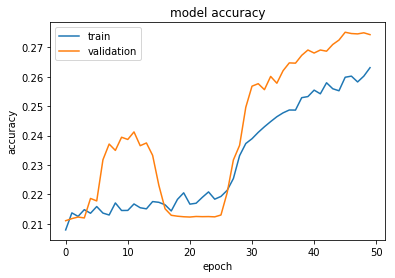

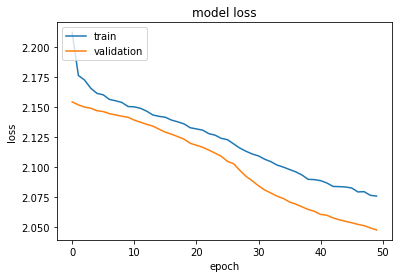

In [16]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()